In [2]:
import numpy as np
import lpt as lpt
import CosmologyLibraryM as cosmolib
import matplotlib.pyplot as plt
import gc
import copy
import time
import numpy.ma as ma

In [3]:
## All the parameters 
GridSize = 256
XSize = 128.

# Obtaining initial density field and the associated Power Spectrum

In [3]:
## Get a density field
inst1 = lpt.initial_density_field(GridSize=GridSize, XSize = XSize,Seed = None)
deltax =  inst1.initial_deltax()
kbyh,Pkbyh,ind = inst1.PS_initial()
del ind
gc.collect()

23

 # Calculating Power Spectrum of the initial density field (Sanity Check)

In [4]:
start = time.time()
Pk,k = inst1.PS_calc(XSize,deltax,NofBins=100,kmin=None,kmax=None)
j=0
print time.time()-start
del deltax,inst1
gc.collect()

2.10201907158


0


#### Multiple Realisations

In [5]:
Pkm = copy.deepcopy(Pk)

In [6]:
j+=1
N=100
for i in range(0,N):
    inst1 = lpt.initial_density_field(GridSize = GridSize, XSize = XSize, Seed = None)
    deltax = inst1.initial_deltax()
    Pk_temp,k_temp = inst1.PS_calc(XSize,deltax,NofBins = 100, kmin=None, kmax=None)
    Pkm+=Pk_temp
    del inst1,deltax,Pk_temp,k_temp
    gc.collect()
Pkmult = Pkm/(1+j*N)
print (1+j*N)

101


/home/sujatha/anaconda2/lib/python2.7/site-packages/numpy/core/numeric.py:531: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


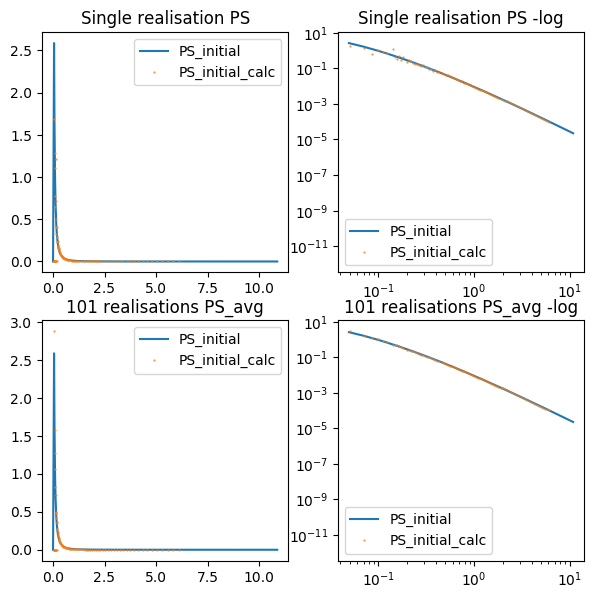

In [7]:
fig = plt.figure(figsize=(7,7), dpi= 100, facecolor='w', edgecolor='k')
plt.subplot(2,2,1)
plt.title('Single realisation PS')
plt.plot(kbyh,Pkbyh,label='PS_initial')
plt.plot(k,Pk,'.',markersize=1,label='PS_initial_calc')
plt.legend()

plt.subplot(2,2,2)
plt.title('Single realisation PS -log')
plt.loglog(kbyh,Pkbyh,label='PS_initial')
plt.loglog(k,Pk,'.',markersize=1,label='PS_initial_calc')
plt.legend()

plt.subplot(2,2,3)

plt.title(str(1+j*100)+' realisations PS_avg')
plt.plot(kbyh,Pkbyh,label='PS_initial')
plt.plot(k,Pkmult,'.',markersize=1,label='PS_initial_calc')
plt.legend()

plt.subplot(2,2,4)
plt.title(str(1+j*100)+' realisations PS_avg -log')
plt.loglog(kbyh,Pkbyh,label = 'PS_initial')
plt.loglog(k,Pkmult,'.',markersize=1,label='PS_initial_calc')
plt.legend()
plt.show()

In [8]:
del Pkmult,k,kbyh,Pkbyh,Pkm,Pk
gc.collect()

2348

## Comparing 2lpt,zeldovich,linear power spectrum at different redshifts

### Box Size 128 Mpc h^-1

In [4]:
inst2 = lpt.LPT(GridSize=GridSize, XSize = 128,Seed = None)
print '1'
RedShift =0
Pk_zeld ,k_zeld = inst2.PS_zeld_cic(RedShift)
print '2'
k = np.logspace(-3,2,100)
Tf_bbks = inst2.BBKS_tf(k)
print '3'
Pk_linear = inst2.PS(k,RedShift,Tf_bbks)
print '4'
Pk_2lpt ,k_2lpt = inst2.PS_2lpt_cic(RedShift)
print '5'
###Plotting
fig=plt.figure(figsize=(16,16))


caption = ["z = 0", "z = 10", "z = 100","linear","zeld","2lpt"]
f = lambda l: plt.plot([],[], color = 'k', linestyle = l)[0]
h = lambda c: plt.plot([],[], color = c , linestyle = '-')[0]
handles = [h("crimson"),h("purple"),h("gold"),f("-"),f("--"),f("-.")]


plt.subplot(3,2,1)
plt.title('Box = 128 Mpc h^-1')


plt.loglog(k_2lpt[np.where(Pk_2lpt>1e-6)[0]],Pk_2lpt[np.where(Pk_2lpt>1e-6)[0]],color = "crimson",linestyle ="--" ,label='2lpt')
plt.loglog(k_zeld[np.where(Pk_zeld>1e-6)[0]],Pk_zeld[np.where(Pk_zeld>1e-6)[0]],color="crimson",linestyle = "-.",label='zeld')


plt.loglog(k,Pk_linear,color = "crimson",label = 'linear PS')
plt.axvline(k_2lpt.min(),color='k', linestyle='--',linewidth=.1)
plt.axvline(k_2lpt.max(),color='k', linestyle='--',linewidth=.1)

plt.subplot(3,2,2)
plt.loglog(k_2lpt[np.where(Pk_2lpt>1e-6)[0]],Pk_2lpt[np.where(Pk_2lpt>1e-6)[0]],color="crimson",linestyle ="--" ,label='2lpt')
plt.loglog(k_zeld[np.where(Pk_zeld>1e-6)[0]],Pk_zeld[np.where(Pk_zeld>1e-6)[0]],color="crimson",linestyle = "-.",label='zeld')

plt.loglog(k,Pk_linear,color = "crimson",label = 'linear PS')
plt.axvline(k_2lpt.min(),color='k', linestyle='--',linewidth=.1)
plt.axvline(k_2lpt.max(),color='k', linestyle='--',linewidth=.1)
plt.xlim([k_2lpt.min(),k_2lpt.max()])

RedShift =10
Pk_zeld ,k_zeld = inst2.PS_zeld_cic(RedShift)
k = np.logspace(-3,2,100)
Tf_bbks = inst2.BBKS_tf(k)
Pk_linear = inst2.PS(k,RedShift,Tf_bbks)
Pk_2lpt ,k_2lpt = inst2.PS_2lpt_cic(RedShift)

###Plotting
plt.subplot(3,2,1)
plt.loglog(k_2lpt[np.where(Pk_2lpt>1e-6)[0]],Pk_2lpt[np.where(Pk_2lpt>1e-6)[0]],color = "purple",linestyle ="--" ,label='2lpt')
plt.loglog(k_zeld[np.where(Pk_zeld>1e-6)[0]],Pk_zeld[np.where(Pk_zeld>1e-6)[0]],color = "purple",linestyle = "-.",label='zeld')
plt.loglog(k,Pk_linear,color = "purple",label = 'linear PS')
plt.axvline(k_2lpt.min(),color='k', linestyle='--',linewidth=.1)
plt.axvline(k_2lpt.max(),color='k', linestyle='--',linewidth=.1)
print k_2lpt.min(),k_zeld.min()

plt.subplot(3,2,2)
plt.loglog(k_2lpt[np.where(Pk_2lpt>1e-6)[0]],Pk_2lpt[np.where(Pk_2lpt>1e-6)[0]],color = "purple",linestyle ="--" ,label='2lpt')
plt.loglog(k_zeld[np.where(Pk_zeld>1e-6)[0]],Pk_zeld[np.where(Pk_zeld>1e-6)[0]],color = "purple",linestyle = "-.",label='zeld')
plt.loglog(k,Pk_linear,color = "purple",label = 'linear PS')
plt.axvline(k_2lpt.min(),color='k', linestyle='--',linewidth=.1)
plt.axvline(k_2lpt.max(),color='k', linestyle='--',linewidth=.1)
plt.xlim([k_2lpt.min(),k_2lpt.max()])


RedShift =100
Pk_zeld ,k_zeld = inst2.PS_zeld_cic(RedShift)
k = np.logspace(-3,2,100)
Tf_bbks = inst2.BBKS_tf(k)
Pk_linear = inst2.PS(k,RedShift,Tf_bbks)
Pk_2lpt ,k_2lpt = inst2.PS_2lpt_cic(RedShift)

###Plotting
plt.subplot(3,2,1)
plt.loglog(k_2lpt[np.where(Pk_2lpt>1e-6)[0]],Pk_2lpt[np.where(Pk_2lpt>1e-6)[0]],color = "gold",linestyle ="--" ,label='2lpt')
plt.loglog(k_zeld[np.where(Pk_zeld>1e-6)[0]],Pk_zeld[np.where(Pk_zeld>1e-6)[0]],color = "gold",linestyle = "-.",label='zeld')
plt.loglog(k,Pk_linear,color = "gold",label = 'linear PS')
plt.axvline(k_2lpt.min(),color='k', linestyle='--',linewidth=.1)
plt.axvline(k_2lpt.max(),color='k', linestyle='--',linewidth=.1)
plt.legend(handles,caption)

plt.subplot(3,2,2)
plt.loglog(k_2lpt[np.where(Pk_2lpt>1e-6)[0]],Pk_2lpt[np.where(Pk_2lpt>1e-6)[0]],color = "gold",linestyle ="--" ,label='2lpt')
plt.loglog(k_zeld[np.where(Pk_zeld>1e-6)[0]],Pk_zeld[np.where(Pk_zeld>1e-6)[0]],color = "gold",linestyle = "-.",label='zeld')
plt.loglog(k,Pk_linear,color = "gold",label = 'linear PS')
plt.axvline(k_2lpt.min(),color='k', linestyle='--',linewidth=.1)
plt.axvline(k_2lpt.max(),color='k', linestyle='--',linewidth=.1)
plt.xlim([k_2lpt.min(),k_2lpt.max()])
plt.legend(handles,caption)

1
2
3
4
5


/home/sujatha/anaconda2/lib/python2.7/site-packages/numpy/core/numeric.py:531: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


0.050305141311 0.050305141311


### Box Size = 1024 h Mpc^-1

In [5]:

inst2 = lpt.LPT(GridSize=GridSize, XSize = 1024,Seed = None)
RedShift =0
Pk_zeld ,k_zeld = inst2.PS_zeld_cic(RedShift)
k = np.logspace(-3,2,100)
Tf_bbks = inst2.BBKS_tf(k)
Pk_linear = inst2.PS(k,RedShift,Tf_bbks)
Pk_2lpt ,k_2lpt = inst2.PS_2lpt_cic(RedShift)

###Plotting
plt.subplot(3,2,3)
plt.title('Box = 1024 Mpc h^-1')

plt.loglog(k_2lpt[np.where(Pk_2lpt>1e-6)[0]],Pk_2lpt[np.where(Pk_2lpt>1e-6)[0]],color = "crimson",linestyle ="--" ,label='2lpt')
plt.loglog(k_zeld[np.where(Pk_zeld>1e-6)[0]],Pk_zeld[np.where(Pk_zeld>1e-6)[0]],color = "crimson",linestyle = "-.",label='zeld')


plt.loglog(k,Pk_linear,color = "crimson",label = 'linear PS')
plt.axvline(k_2lpt.min(),color='k', linestyle='--',linewidth=.1)
plt.axvline(k_2lpt.max(),color='k', linestyle='--',linewidth=.1)
print k_2lpt.min(),k_zeld.min()

plt.subplot(3,2,4)
plt.loglog(k_2lpt[np.where(Pk_2lpt>1e-6)[0]],Pk_2lpt[np.where(Pk_2lpt>1e-6)[0]],color = "crimson",linestyle ="--" ,label='2lpt')
plt.loglog(k_zeld[np.where(Pk_zeld>1e-6)[0]],Pk_zeld[np.where(Pk_zeld>1e-6)[0]],color = "crimson",linestyle = "-.",label='zeld')
plt.loglog(k,Pk_linear,color = "crimson",label = 'linear PS')
plt.axvline(k_2lpt.min(),color='k', linestyle='--',linewidth=.1)
plt.axvline(k_2lpt.max(),color='k', linestyle='--',linewidth=.1)
plt.xlim([k_2lpt.min(),k_2lpt.max()])

RedShift =10
Pk_zeld ,k_zeld = inst2.PS_zeld_cic(RedShift)
k = np.logspace(-3,2,100)
Tf_bbks = inst2.BBKS_tf(k)
Pk_linear = inst2.PS(k,RedShift,Tf_bbks)
Pk_2lpt ,k_2lpt = inst2.PS_2lpt_cic(RedShift)

###Plotting
plt.subplot(3,2,3)
plt.loglog(k_2lpt[np.where(Pk_2lpt>1e-6)[0]],Pk_2lpt[np.where(Pk_2lpt>1e-6)[0]],color = "purple",linestyle ="--" ,label='2lpt')
plt.loglog(k_zeld[np.where(Pk_zeld>1e-6)[0]],Pk_zeld[np.where(Pk_zeld>1e-6)[0]],color = "purple",linestyle = "-.",label='zeld')
plt.loglog(k,Pk_linear,color = "purple",label = 'linear PS')
plt.axvline(k_2lpt.min(),color='k', linestyle='--',linewidth=.1)
plt.axvline(k_2lpt.max(),color='k', linestyle='--',linewidth=.1)
print k_2lpt.min(),k_zeld.min()

plt.subplot(3,2,4)
plt.loglog(k_2lpt[np.where(Pk_2lpt>1e-6)[0]],Pk_2lpt[np.where(Pk_2lpt>1e-6)[0]],color = "purple",linestyle ="--" ,label='2lpt')
plt.loglog(k_zeld[np.where(Pk_zeld>1e-6)[0]],Pk_zeld[np.where(Pk_zeld>1e-6)[0]],color = "purple",linestyle = "-.",label='zeld')
plt.loglog(k,Pk_linear,color = "purple",label = 'linear PS')
plt.axvline(k_2lpt.min(),color='k', linestyle='--',linewidth=.1)
plt.axvline(k_2lpt.max(),color='k', linestyle='--',linewidth=.1)
plt.xlim([k_2lpt.min(),k_2lpt.max()])


RedShift =100
Pk_zeld ,k_zeld = inst2.PS_zeld_cic(RedShift)
k = np.logspace(-3,2,100)
Tf_bbks = inst2.BBKS_tf(k)
Pk_linear = inst2.PS(k,RedShift,Tf_bbks)
Pk_2lpt ,k_2lpt = inst2.PS_2lpt_cic(RedShift)

###Plotting
plt.subplot(3,2,3)
plt.loglog(k_2lpt[np.where(Pk_2lpt>1e-6)[0]],Pk_2lpt[np.where(Pk_2lpt>1e-6)[0]],color = "gold",linestyle ="--" ,label='2lpt')
plt.loglog(k_zeld[np.where(Pk_zeld>1e-6)[0]],Pk_zeld[np.where(Pk_zeld>1e-6)[0]],color = "gold",linestyle = "-.",label='zeld')
plt.loglog(k,Pk_linear,color = "gold",label = 'linear PS')
plt.axvline(k_2lpt.min(),color='k', linestyle='--',linewidth=.1)
plt.axvline(k_2lpt.max(),color='k', linestyle='--',linewidth=.1)
plt.legend(handles,caption)

plt.subplot(3,2,4)
plt.loglog(k_2lpt[np.where(Pk_2lpt>1e-6)[0]],Pk_2lpt[np.where(Pk_2lpt>1e-6)[0]],color = "gold",linestyle ="--" ,label='2lpt')
plt.loglog(k_zeld[np.where(Pk_zeld>1e-6)[0]],Pk_zeld[np.where(Pk_zeld>1e-6)[0]],color = "gold",linestyle = "-.",label='zeld')
plt.loglog(k,Pk_linear,color = "gold",label = 'linear PS')
plt.axvline(k_2lpt.min(),color='k', linestyle='--',linewidth=.1)
plt.axvline(k_2lpt.max(),color='k', linestyle='--',linewidth=.1)
plt.xlim([k_2lpt.min(),k_2lpt.max()])
plt.legend(handles,caption)

0.00628814266388 0.00628814266388
0.00628814266388 0.00628814266388


### BoxSize = 4096 Mpc h ^-1

0.00157203566597 0.00157203566597


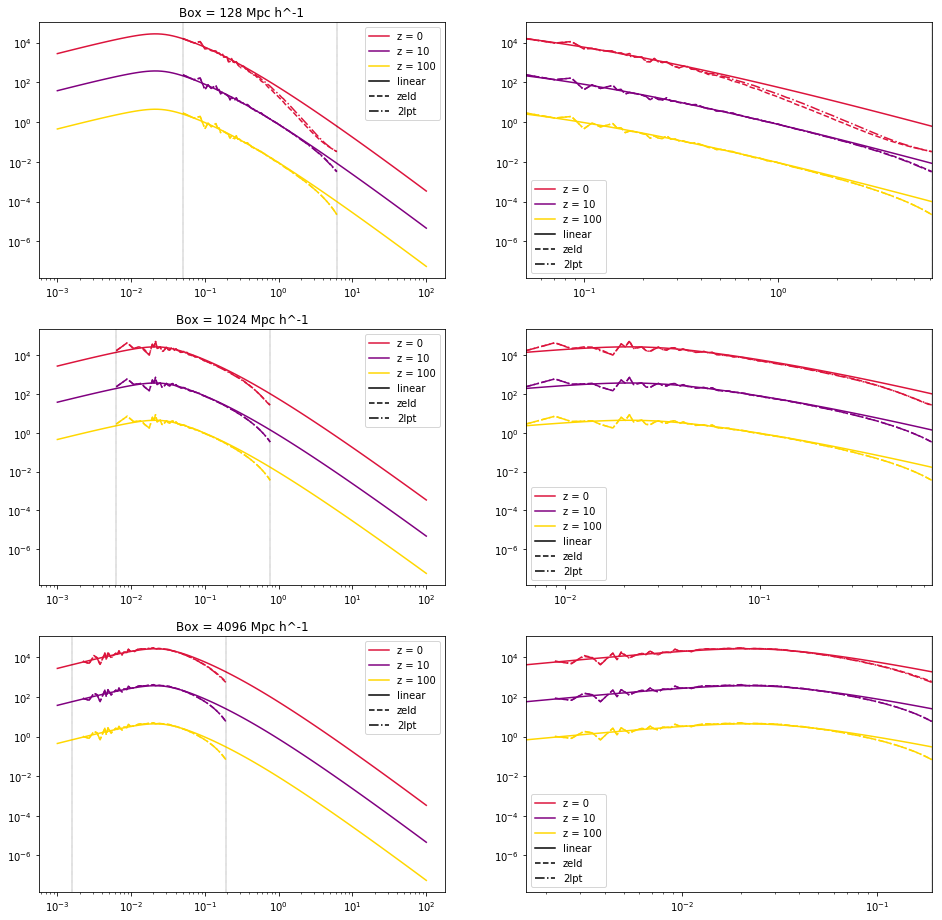

In [6]:
inst2 = lpt.LPT(GridSize=GridSize, XSize = 4096,Seed = None)
RedShift =0
Pk_zeld ,k_zeld = inst2.PS_zeld_cic(RedShift)
k = np.logspace(-3,2,100)
Tf_bbks = inst2.BBKS_tf(k)
Pk_linear = inst2.PS(k,RedShift,Tf_bbks)
Pk_2lpt ,k_2lpt = inst2.PS_2lpt_cic(RedShift)

###Plotting
plt.subplot(3,2,5)
plt.title('Box = 4096 Mpc h^-1')

plt.loglog(k_2lpt[np.where(Pk_2lpt>1e-6)[0]],Pk_2lpt[np.where(Pk_2lpt>1e-6)[0]],color = "crimson",linestyle ="--" ,label='2lpt')
plt.loglog(k_zeld[np.where(Pk_zeld>1e-6)[0]],Pk_zeld[np.where(Pk_zeld>1e-6)[0]],color = "crimson",linestyle = "-.",label='zeld')

plt.loglog(k,Pk_linear,color = "crimson",label = 'linear PS')
plt.axvline(k_2lpt.min(),color='k', linestyle='--',linewidth=.1)
plt.axvline(k_2lpt.max(),color='k', linestyle='--',linewidth=.1)

plt.subplot(3,2,6)
plt.loglog(k_2lpt[np.where(Pk_2lpt>1e-6)[0]],Pk_2lpt[np.where(Pk_2lpt>1e-6)[0]],color = "crimson",linestyle ="--" ,label='2lpt')
plt.loglog(k_zeld[np.where(Pk_zeld>1e-6)[0]],Pk_zeld[np.where(Pk_zeld>1e-6)[0]],color = "crimson",linestyle = "-.",label='zeld')
plt.loglog(k,Pk_linear,color = "crimson",label = 'linear PS')
plt.axvline(k_2lpt.min(),color='k', linestyle='--',linewidth=.1)
plt.axvline(k_2lpt.max(),color='k', linestyle='--',linewidth=.1)
plt.xlim([k_2lpt.min(),k_2lpt.max()])

RedShift =10
Pk_zeld ,k_zeld = inst2.PS_zeld_cic(RedShift)
k = np.logspace(-3,2,100)
Tf_bbks = inst2.BBKS_tf(k)
Pk_linear = inst2.PS(k,RedShift,Tf_bbks)
Pk_2lpt ,k_2lpt = inst2.PS_2lpt_cic(RedShift)

###Plotting
plt.subplot(3,2,5)
plt.loglog(k_2lpt[np.where(Pk_2lpt>1e-6)[0]],Pk_2lpt[np.where(Pk_2lpt>1e-6)[0]],color = "purple",linestyle ="--" ,label='2lpt')
plt.loglog(k_zeld[np.where(Pk_zeld>1e-6)[0]],Pk_zeld[np.where(Pk_zeld>1e-6)[0]],color = "purple",linestyle = "-.",label='zeld')
plt.loglog(k,Pk_linear,color = "purple",label = 'linear PS')
plt.axvline(k_2lpt.min(),color='k', linestyle='--',linewidth=.1)
plt.axvline(k_2lpt.max(),color='k', linestyle='--',linewidth=.1)
print k_2lpt.min(),k_zeld.min()

plt.subplot(3,2,6)
plt.loglog(k_2lpt[np.where(Pk_2lpt>1e-6)[0]],Pk_2lpt[np.where(Pk_2lpt>1e-6)[0]],color = "purple",linestyle ="--" ,label='2lpt')
plt.loglog(k_zeld[np.where(Pk_zeld>1e-6)[0]],Pk_zeld[np.where(Pk_zeld>1e-6)[0]],color = "purple",linestyle = "-.",label='zeld')
plt.loglog(k,Pk_linear,color = "purple",label = 'linear PS')
plt.axvline(k_2lpt.min(),color='k', linestyle='--',linewidth=.1)
plt.axvline(k_2lpt.max(),color='k', linestyle='--',linewidth=.1)
plt.xlim([k_2lpt.min(),k_2lpt.max()])


RedShift =100
Pk_zeld ,k_zeld = inst2.PS_zeld_cic(RedShift)
k = np.logspace(-3,2,100)
Tf_bbks = inst2.BBKS_tf(k)
Pk_linear = inst2.PS(k,RedShift,Tf_bbks)
Pk_2lpt ,k_2lpt = inst2.PS_2lpt_cic(RedShift)

###Plotting
plt.subplot(3,2,5)
plt.loglog(k_2lpt[np.where(Pk_2lpt>1e-6)[0]],Pk_2lpt[np.where(Pk_2lpt>1e-6)[0]],color = "gold",linestyle ="--" ,label='2lpt')
plt.loglog(k_zeld[np.where(Pk_zeld>1e-6)[0]],Pk_zeld[np.where(Pk_zeld>1e-6)[0]],color = "gold",linestyle = "-.",label='zeld')
plt.loglog(k,Pk_linear,color = "gold",label = 'linear PS')
plt.axvline(k_2lpt.min(),color='k', linestyle='--',linewidth=.1)
plt.axvline(k_2lpt.max(),color='k', linestyle='--',linewidth=.1)
plt.legend(handles,caption)

plt.subplot(3,2,6)
plt.loglog(k_2lpt[np.where(Pk_2lpt>1e-6)[0]],Pk_2lpt[np.where(Pk_2lpt>1e-6)[0]],color = "gold",linestyle ="--" ,label='2lpt')
plt.loglog(k_zeld[np.where(Pk_zeld>1e-6)[0]],Pk_zeld[np.where(Pk_zeld>1e-6)[0]],color = "gold",linestyle = "-.",label='zeld')
plt.loglog(k,Pk_linear,color = "gold",label = 'linear PS')
plt.axvline(k_2lpt.min(),color='k', linestyle='--',linewidth=.1)
plt.axvline(k_2lpt.max(),color='k', linestyle='--',linewidth=.1)
plt.xlim([k_2lpt.min(),k_2lpt.max()])
plt.legend(handles,caption)
plt.show()

## Box 40 Mpc h^-1

0.160976452195 0.160976452195
0.160976452195 0.160976452195
0.160976452195 0.160976452195


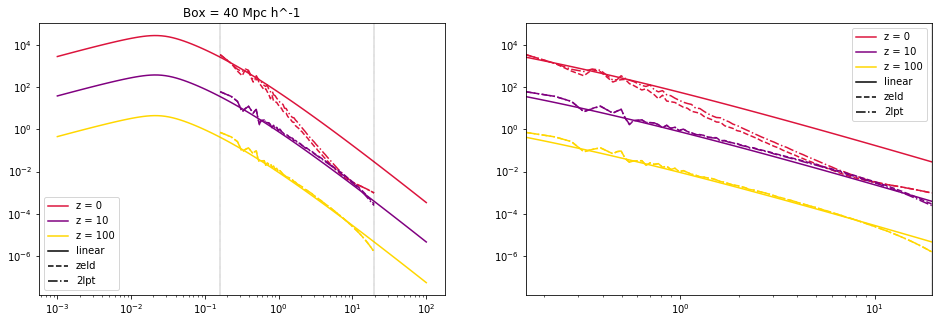

In [7]:
fig=plt.figure(figsize=(16,5))
inst2 = lpt.LPT(GridSize=GridSize, XSize = 40,Seed = None)
RedShift =0
Pk_zeld ,k_zeld = inst2.PS_zeld_cic(RedShift)
k = np.logspace(-3,2,100)
Tf_bbks = inst2.BBKS_tf(k)
Pk_linear = inst2.PS(k,RedShift,Tf_bbks)
Pk_2lpt ,k_2lpt = inst2.PS_2lpt_cic(RedShift)

###Plotting
plt.subplot(1,2,1)
plt.title('Box = 40 Mpc h^-1')

plt.loglog(k_2lpt[np.where(Pk_2lpt>1e-6)[0]],Pk_2lpt[np.where(Pk_2lpt>1e-6)[0]],color = "crimson",linestyle ="--" ,label='2lpt')
plt.loglog(k_zeld[np.where(Pk_zeld>1e-6)[0]],Pk_zeld[np.where(Pk_zeld>1e-6)[0]],color = "crimson",linestyle = "-.",label='zeld')


plt.loglog(k,Pk_linear,color = "crimson",label = 'linear PS')
plt.axvline(k_2lpt.min(),color='k', linestyle='--',linewidth=.1)
plt.axvline(k_2lpt.max(),color='k', linestyle='--',linewidth=.1)
print k_2lpt.min(),k_zeld.min()
plt.legend()

plt.subplot(1,2,2)
plt.loglog(k_2lpt[np.where(Pk_2lpt>1e-6)[0]],Pk_2lpt[np.where(Pk_2lpt>1e-6)[0]],color = "crimson",linestyle ="--" ,label='2lpt')
plt.loglog(k_zeld[np.where(Pk_zeld>1e-6)[0]],Pk_zeld[np.where(Pk_zeld>1e-6)[0]],color = "crimson",linestyle = "-.",label='zeld')
plt.loglog(k,Pk_linear,color = "crimson",label = 'linear PS')
plt.axvline(k_2lpt.min(),color='k', linestyle='--',linewidth=.1)
plt.axvline(k_2lpt.max(),color='k', linestyle='--',linewidth=.1)
plt.legend()
plt.xlim([k_2lpt.min(),k_2lpt.max()])

RedShift =10
Pk_zeld ,k_zeld = inst2.PS_zeld_cic(RedShift)
k = np.logspace(-3,2,100)
Tf_bbks = inst2.BBKS_tf(k)
Pk_linear = inst2.PS(k,RedShift,Tf_bbks)
Pk_2lpt ,k_2lpt = inst2.PS_2lpt_cic(RedShift)

###Plotting
plt.subplot(1,2,1)
plt.loglog(k_2lpt[np.where(Pk_2lpt>1e-6)[0]],Pk_2lpt[np.where(Pk_2lpt>1e-6)[0]],color = "purple",linestyle ="--" ,label='2lpt')
plt.loglog(k_zeld[np.where(Pk_zeld>1e-6)[0]],Pk_zeld[np.where(Pk_zeld>1e-6)[0]],color = "purple",linestyle = "-.",label='zeld')
plt.loglog(k,Pk_linear,color = "purple",label = 'linear PS')
plt.axvline(k_2lpt.min(),color='k', linestyle='--',linewidth=.1)
plt.axvline(k_2lpt.max(),color='k', linestyle='--',linewidth=.1)
print k_2lpt.min(),k_zeld.min()

plt.subplot(1,2,2)
plt.loglog(k_2lpt[np.where(Pk_2lpt>1e-6)[0]],Pk_2lpt[np.where(Pk_2lpt>1e-6)[0]],color = "purple",linestyle ="--" ,label='2lpt')
plt.loglog(k_zeld[np.where(Pk_zeld>1e-6)[0]],Pk_zeld[np.where(Pk_zeld>1e-6)[0]],color = "purple",linestyle = "-.",label='zeld')
plt.loglog(k,Pk_linear,color = "purple",label = 'linear PS')
plt.axvline(k_2lpt.min(),color='k', linestyle='--',linewidth=.1)
plt.axvline(k_2lpt.max(),color='k', linestyle='--',linewidth=.1)
plt.legend()
plt.xlim([k_2lpt.min(),k_2lpt.max()])


RedShift =100
Pk_zeld ,k_zeld = inst2.PS_zeld_cic(RedShift)
k = np.logspace(-3,2,100)
Tf_bbks = inst2.BBKS_tf(k)
Pk_linear = inst2.PS(k,RedShift,Tf_bbks)
Pk_2lpt ,k_2lpt = inst2.PS_2lpt_cic(RedShift)

###Plotting
plt.subplot(1,2,1)
plt.loglog(k_2lpt[np.where(Pk_2lpt>1e-6)[0]],Pk_2lpt[np.where(Pk_2lpt>1e-6)[0]],color = "gold",linestyle ="--" ,label='2lpt')
plt.loglog(k_zeld[np.where(Pk_zeld>1e-6)[0]],Pk_zeld[np.where(Pk_zeld>1e-6)[0]],color = "gold",linestyle = "-.",label='zeld')
plt.loglog(k,Pk_linear,color = "gold",label = 'linear PS')
plt.axvline(k_2lpt.min(),color='k', linestyle='--',linewidth=.1)
plt.axvline(k_2lpt.max(),color='k', linestyle='--',linewidth=.1)
print k_2lpt.min(),k_zeld.min()
plt.legend(handles,caption)

plt.subplot(1,2,2)
plt.loglog(k_2lpt[np.where(Pk_2lpt>1e-6)[0]],Pk_2lpt[np.where(Pk_2lpt>1e-6)[0]],color = "gold",linestyle ="--" ,label='2lpt')
plt.loglog(k_zeld[np.where(Pk_zeld>1e-6)[0]],Pk_zeld[np.where(Pk_zeld>1e-6)[0]],color = "gold",linestyle = "-.",label='zeld')
plt.loglog(k,Pk_linear,color = "gold",label = 'linear PS')
plt.axvline(k_2lpt.min(),color='k', linestyle='--',linewidth=.1)
plt.axvline(k_2lpt.max(),color='k', linestyle='--',linewidth=.1)
plt.legend(handles,caption)
plt.xlim([k_2lpt.min(),k_2lpt.max()])
plt.show()

#### Overplotting all the different resolutions to get full power spectrum

In [9]:
print GridSize


256


In [ ]:
## defining redshift and linear power spectrum
RedShift =10
k = np.logspace(-3,2,100)
Tf_bbks = inst2.BBKS_tf(k)
Pk_linear = inst2.PS(k,RedShift,Tf_bbks)


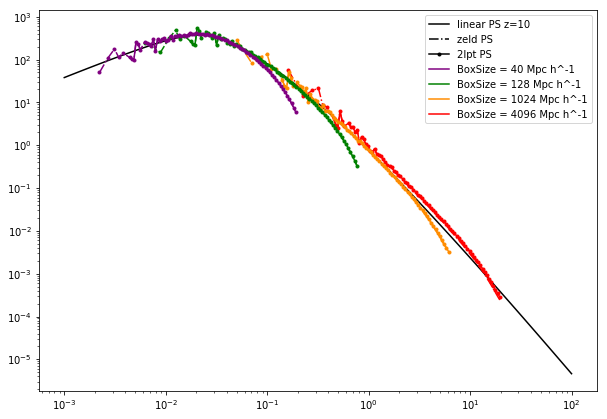

In [16]:
inst2 = lpt.LPT(GridSize=GridSize, XSize = 40,Seed = 30000)
Pk_zeld ,k_zeld = inst2.PS_zeld_cic(RedShift)
Pk_2lpt ,k_2lpt = inst2.PS_2lpt_cic(RedShift)
fig=plt.figure(figsize=(10,7))

##plotting
plt.loglog(k,Pk_linear,color = "k",label = 'linear PS')
plt.loglog(k_zeld[np.where(Pk_zeld>1e-6)[0]],Pk_zeld[np.where(Pk_zeld>1e-6)[0]],color = "red",linestyle = '-.')
plt.loglog(k_2lpt,Pk_2lpt,color = "red",marker = '.')

inst2 = lpt.LPT(GridSize=GridSize, XSize = 128,Seed = 30000)
Pk_zeld ,k_zeld = inst2.PS_zeld_cic(RedShift)
Pk_2lpt ,k_2lpt = inst2.PS_2lpt_cic(RedShift)
plt.loglog(k_zeld[np.where(Pk_zeld>1e-6)[0]],Pk_zeld[np.where(Pk_zeld>1e-6)[0]],color = "darkorange",linestyle = '-.')
plt.loglog(k_2lpt,Pk_2lpt,color = "darkorange",marker = '.')

inst2 = lpt.LPT(GridSize=GridSize, XSize = 1024,Seed = 30000)
Pk_zeld ,k_zeld = inst2.PS_zeld_cic(RedShift)
Pk_2lpt ,k_2lpt = inst2.PS_2lpt_cic(RedShift)
plt.loglog(k_zeld[np.where(Pk_zeld>1e-6)[0]],Pk_zeld[np.where(Pk_zeld>1e-6)[0]],color = "g",linestyle = '-.')
plt.loglog(k_2lpt,Pk_2lpt,color = "g",marker = '.')

inst2 = lpt.LPT(GridSize=GridSize, XSize = 4096,Seed = 30000)
Pk_zeld ,k_zeld = inst2.PS_zeld_cic(RedShift)
Pk_2lpt ,k_2lpt = inst2.PS_2lpt_cic(RedShift)
plt.loglog(k_zeld[np.where(Pk_zeld>1e-6)[0]],Pk_zeld[np.where(Pk_zeld>1e-6)[0]],color = "purple",linestyle = '-.')
plt.loglog(k_2lpt,Pk_2lpt,color = "purple",marker = '.')

caption = ["linear PS z=10", "zeld PS","2lpt PS","BoxSize = 40 Mpc h^-1","BoxSize = 128 Mpc h^-1", "BoxSize = 1024 Mpc h^-1","BoxSize = 4096 Mpc h^-1"]
f = lambda l,c,m: plt.plot([],[], color = c, linestyle = l,marker = m)[0]
handles = [f("-","k",None),f("-.","k",None),f(None,"k","."),f("-","purple",None),f("-","g",None),f("-","darkorange",None),f("-","red",None)]
plt.legend(handles,caption)
plt.show()